# KNN (K nearest -Neighbors) and SVM (Support Vactor Machines)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 : Read the dataset

In [3]:
import pandas as pd
df = pd.read_csv("iris.csv")
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Step 2 : Perform basic data quality check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.duplicated().sum()

1

### Step 3 : Seperate X and Y(species)


In [6]:
x = df.drop(columns=["species"])
y = df[["species"]]

In [7]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
dtype: int64

### Step 4 : Apply Preprocessing on X

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [13]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [14]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Step 5 : Train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.33,random_state=42)


In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [17]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


### Step 6 : Model building

In [18]:
from  sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(xtrain,ytrain)


KNeighborsClassifier(n_neighbors=31)

In [20]:
knn.score(xtrain,ytrain)

0.87

In [21]:
knn.score(xtest,ytest)

0.88

### Hyperparameter tuning

In [22]:
params = {
    "n_neighbors" : [5,6,7,8,9,10,11,12]
}

In [23]:
from sklearn.model_selection import RandomizedSearchCV
model1 = KNeighborsClassifier()
rscv = RandomizedSearchCV(
    estimator= model1,
    param_distributions= params,
    cv = 5,
    scoring= "f1_macro"
)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12]},
                   scoring='f1_macro')

In [24]:
rscv.best_params_

{'n_neighbors': 10}

In [25]:
rscv.best_score_

0.9207936507936509

In [26]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=10)

In [28]:
best_knn.score(xtrain,ytrain)

0.95

In [29]:
best_knn.score(xtest,ytest)

0.98

Evaluate KNN model

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
scores = cross_val_score(
    best_knn,xtrain,ytrain,cv =5 , scoring= "f1_macro"
)

In [32]:
scores

array([1.        , 0.80952381, 0.90277778, 1.        , 0.89166667])

In [33]:
scores.mean()

0.9207936507936509

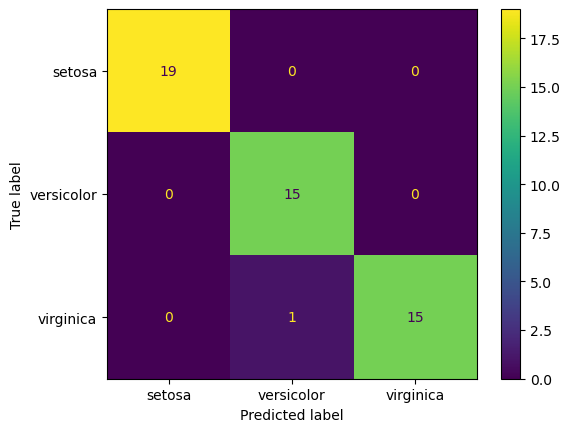

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn,xtest,ytest)

In [35]:
ypred_knn = best_knn.predict(xtest)
ypred_knn[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [36]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Out of sample pred for KNN

In [38]:
x_new = pd.read_csv("iris_sample.csv")

In [39]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [40]:
x_new_pre = num_pipe.transform(x_new)
x_new_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671


In [43]:
best_knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
pred1 = best_knn.predict(x_new_pre)
pred1

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [42]:
probs = best_knn.predict_proba(x_new_pre)
probs

array([[0. , 1. , 0. ],
       [0. , 0.1, 0.9],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.1, 0.9],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0.7, 0.3]])

In [44]:
x_new["Species_pred"] = pred1
x_new[best_knn.classes_] = probs

In [45]:
x_new

,sepal_length,sepal_width,petal_length,petal_width,Species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0,1.0,0.0
1,6.9,3.1,5.1,2.3,virginica,0.0,0.1,0.9
2,5.1,2.5,3.0,1.1,versicolor,0.0,1.0,0.0
3,4.4,2.9,NaN,0.2,setosa,1.0,0.0,0.0
4,5.9,3.0,5.1,1.8,versicolor,0.0,0.5,0.5
5,5.5,3.5,1.3,0.2,setosa,1.0,0.0,0.0
6,5.6,NaN,3.6,1.3,versicolor,0.0,1.0,0.0
7,6.5,3.0,5.2,2.0,virginica,0.0,0.1,0.9
8,5.3,3.7,1.5,0.2,setosa,1.0,0.0,0.0
9,5.1,3.4,1.5,NaN,setosa,1.0,0.0,0.0


In [47]:
x_new.to_csv("KNN_Reults.csv",index = False)


# SVM - Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
svm_model = SVC(probability=True)
svm_model.fit(xtrain,ytrain)

SVC(probability=True)

In [51]:
svm_model.score(xtrain,ytrain)

0.97

In [53]:
svm_model.score(xtest,ytest)

0.96

In [54]:
scores2 = cross_val_score(
    svm_model,xtrain,ytrain,cv= 5, scoring= "f1_macro"
)

In [55]:
scores2

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [56]:
scores2.mean()

0.9319552669552669

### Evaluate Model

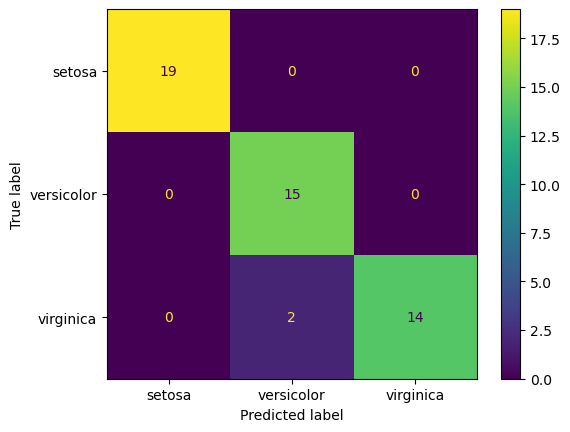

In [57]:
ConfusionMatrixDisplay.from_estimator(svm_model,xtest , ytest)

In [58]:
svm_preds = svm_model.predict(xtest)

In [59]:
svm_preds[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [60]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [61]:
print(classification_report(ytest,svm_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



### Out of sample prediction from SVM

In [62]:
x_new2 = pd.read_csv("iris_sample.csv")
x_new2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [63]:
x_new2_pre = num_pipe.transform(x_new2)
x_new2_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [64]:
pred2 = svm_model.predict(x_new2_pre)
pred2

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [65]:
svm_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [66]:
probs2 = svm_model.predict_proba(x_new2_pre)
probs2

array([[0.03491734, 0.84314261, 0.12194005],
       [0.02328407, 0.02594296, 0.95077296],
       [0.12611932, 0.78726261, 0.08661807],
       [0.6079382 , 0.26567411, 0.12638769],
       [0.02674011, 0.32835465, 0.64490525],
       [0.91930804, 0.04512512, 0.03556684],
       [0.06298794, 0.9089565 , 0.02805556],
       [0.01941645, 0.06708064, 0.91350291],
       [0.92610477, 0.03972956, 0.03416567],
       [0.75048952, 0.17851109, 0.07099939],
       [0.02269561, 0.93934906, 0.03795534],
       [0.05135053, 0.87920118, 0.06944828],
       [0.02903375, 0.01863396, 0.95233229],
       [0.03890135, 0.68323133, 0.27786732],
       [0.05493392, 0.29710385, 0.64796223]])

In [70]:
x_new2["species_pred"] = pred2
x_new2[svm_model.classes_] = probs2
x_new2 = x_new2.round(4)

In [71]:
x_new2

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0349,0.8431,0.1219
1,6.9,3.1,5.1,2.3,virginica,0.0233,0.0259,0.9508
2,5.1,2.5,3.0,1.1,versicolor,0.1261,0.7873,0.0866
3,4.4,2.9,NaN,0.2,setosa,0.6079,0.2657,0.1264
4,5.9,3.0,5.1,1.8,virginica,0.0267,0.3284,0.6449
5,5.5,3.5,1.3,0.2,setosa,0.9193,0.0451,0.0356
6,5.6,NaN,3.6,1.3,versicolor,0.0630,0.9090,0.0281
7,6.5,3.0,5.2,2.0,virginica,0.0194,0.0671,0.9135
8,5.3,3.7,1.5,0.2,setosa,0.9261,0.0397,0.0342
9,5.1,3.4,1.5,NaN,setosa,0.7505,0.1785,0.0710


In [72]:
x_new2.to_csv("SVM_Results.csv",index= False)

### SVM and KNN performs better on smaller datasets upto 1000 rows